In [1]:
from numpy import array, dot, linspace, random, sign
from scipy.special import factorial
from math import fabs
import matplotlib.pyplot as plt


In [2]:
random.seed(42)

noise_std = 0.7
nb_samples = 20000

In [3]:
def f0(t,K,n):
    return dot(t**linspace(0, n-1, n),K)

In [4]:
def df0(t,K,n,d):
    return dot(t**linspace(0, n-1-d, n-d),K[d:]*(factorial(linspace(0, n-1, n))[d:] / factorial(linspace(0, n-1-d, n-d))))

In [5]:
n = 5
K = array([5, -0.004, 0.0003, -0.00002, 0.000001])[:n]

In [6]:
ts = [0] + list(map(lambda x: x , linspace(1, nb_samples, nb_samples)))

In [7]:
fs = list(map(lambda t: f0(t,K,n) + random.normal(0, noise_std), ts))

In [8]:
z_HOUND = [0 for _ in range(n)]
zLevant = [0 for _ in range(n)]
z_Levant = [0 for _ in range(n)]
zKhalil = [0 for _ in range(n)]
z_Khalil = [0 for _ in range(n)]
z_HOUND[0] = fs[0]
zLevant[0] = fs[0]
zKhalil[0] = fs[0]
zs_HOUND = [[z_HOUND[j]] for j in range(n)]
zsLevant = [[zLevant[j]] for j in range(n)]
zsKhalil = [[zKhalil[j]] for j in range(n)]

es_HOUND = [[] for _ in range(n)]
esLevant = [[] for _ in range(n)]
esKhalil = [[] for _ in range(n)]
aes_HOUND = [[] for _ in range(n)]
aesLevant = [[] for _ in range(n)]
aesKhalil = [[] for _ in range(n)]
ks_HOUND = [[] for _ in range(n)]
ksLevant = [[] for _ in range(n)]
ksKhalil = [[] for _ in range(n)]
ls = []
for j in range(n):
    ls.append(linspace(0, n-1-j, n-j))
    es_HOUND[j].append(z_HOUND[j] - df0(0,K,n,j))
    esLevant[j].append(zLevant[j] - df0(0,K,n,j))
    esKhalil[j].append(zKhalil[j] - df0(0,K,n,j))
    aes_HOUND[j].append(fabs(z_HOUND[j] - df0(0,K,n,j)))
    aesLevant[j].append(fabs(zLevant[j] - df0(0,K,n,j)))
    aesKhalil[j].append(fabs(zKhalil[j] - df0(0,K,n,j)))
    ks_HOUND[j].append(0)
    ksLevant[j].append(0)
    ksKhalil[j].append(0)
    
fctrls = []
for m in range(1,n+1):
    fctrls.append((factorial(n+m-1)/factorial(m)/factorial(n-m))*n)

for i in range(1,len(ts)):
    t = ts[i]
    dt = t - ts[i-1]
    
    eps_HOUND = fs[i] - dot(dt**ls[0], z_HOUND[:] / factorial(ls[0]))
    z__HOUND = [dot(dt**ls[m-1] / factorial(ls[m-1]), z_HOUND[(m-1):]) + (dt*fctrls[m-1]/(t**m))*eps_HOUND for m in range(1,n+1)]
    epsLevant = fs[i] - (zLevant[0] + zLevant[1]*dt + zLevant[2]*dt*dt/2 + zLevant[3]*dt*dt*dt/6)
    STD_L = 0.000024/1.1 #fabs(K[4]*factorial(4))/1.1
    z_Levant[0] = zLevant[0] +    3*(STD_L**(1/4))*sign(epsLevant)*(fabs(epsLevant)**(3/4))*dt + zLevant[1]*dt + zLevant[2]*dt*dt/2 + zLevant[3]*dt*dt*dt/6
    z_Levant[1] = zLevant[1] + 4.16*(STD_L**(2/4))*sign(epsLevant)*(fabs(epsLevant)**(2/4))*dt + zLevant[2]*dt + zLevant[3]*dt*dt/2
    z_Levant[2] = zLevant[2] + 3.06*(STD_L**(3/4))*sign(epsLevant)*(fabs(epsLevant)**(1/4))*dt + zLevant[3]*dt
    z_Levant[3] = zLevant[3] +  1.1*(STD_L**(4/4))*sign(epsLevant)*(fabs(epsLevant)**(0/4))*dt
    z_Levant[4] = 0.000024 #K[4]*factorial(4)
    epsKhalil = fs[i] - dot(dt**ls[0], zKhalil[:] / factorial(ls[0]))
    HGD_L = 1/5
    z_Khalil[0] = zKhalil[0] + (    5*(HGD_L**1))*epsKhalil*dt + zKhalil[1]*dt + zKhalil[2]*dt*dt/2 + zKhalil[3]*dt*dt*dt/6 + zKhalil[4]*dt*dt*dt*dt/24
    z_Khalil[1] = zKhalil[1] + (10.03*(HGD_L**2))*epsKhalil*dt + zKhalil[2]*dt + zKhalil[3]*dt*dt/2 + zKhalil[4]*dt*dt*dt/6
    z_Khalil[2] = zKhalil[2] + ( 9.30*(HGD_L**3))*epsKhalil*dt + zKhalil[3]*dt + zKhalil[4]*dt*dt/2
    z_Khalil[3] = zKhalil[3] + ( 4.57*(HGD_L**4))*epsKhalil*dt + zKhalil[4]*dt
    z_Khalil[4] = zKhalil[4] + (  1.1*(HGD_L**5))*epsKhalil*dt
    k__HOUND = [dot((0-t)**ls[j] / factorial(ls[j]), z__HOUND[j:]) / factorial(j) for j in range(n)]
    k_Levant = [dot((0-t)**ls[j] / factorial(ls[j]), z_Levant[j:]) / factorial(j) for j in range(n)]
    k_Khalil = [dot((0-t)**ls[j] / factorial(ls[j]), z_Khalil[j:]) / factorial(j) for j in range(n)]
    for j in range(n):
        z_HOUND[j] = z__HOUND[j]
        zLevant[j] = z_Levant[j]
        zKhalil[j] = z_Khalil[j]
        zs_HOUND[j].append(z_HOUND[j])
        zsLevant[j].append(zLevant[j])
        zsKhalil[j].append(zKhalil[j])
        es_HOUND[j].append(z_HOUND[j] - df0(t,K,n,j))
        esLevant[j].append(zLevant[j] - df0(t,K,n,j))
        esKhalil[j].append(zKhalil[j] - df0(t,K,n,j))
        aes_HOUND[j].append(fabs(es_HOUND[j][-1:][0]))
        aesLevant[j].append(fabs(esLevant[j][-1:][0]))
        aesKhalil[j].append(fabs(esKhalil[j][-1:][0]))
        ks_HOUND[j].append(k__HOUND[j])
        ksLevant[j].append(k_Levant[j])
        ksKhalil[j].append(k_Khalil[j])

interp_HOUND = []
interpLevant = []
interpKhalil = []
t = ts[-1]
for i in range(len(ts)):
    tau = ts[i]
    interp_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))
    interpLevant.append(dot((tau - t)**ls[0] / factorial(ls[0]), zLevant[:]))
    interpKhalil.append(dot((tau - t)**ls[0] / factorial(ls[0]), zKhalil[:]))

extra_prev_ts = []
extra_prev_f0 = []
extra_prev_z0_HOUND = []
extra_prev_z0Levant = []
extra_prev_z0Khalil = []
for tau in range(-100,0):
    extra_prev_ts.append(tau)
    extra_prev_f0.append(f0(tau,K,n))
    extra_prev_z0_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))
    extra_prev_z0Levant.append(dot((tau - t)**ls[0] / factorial(ls[0]), zLevant[:]))
    extra_prev_z0Khalil.append(dot((tau - t)**ls[0] / factorial(ls[0]), zKhalil[:]))

extra_post_ts = []
extra_post_f0 = []
extra_post_z0_HOUND = []
extra_post_z0Levant = []
extra_post_z0Khalil = []
for tau in range(int(t)+0,int(t)+100):
    extra_post_ts.append(tau)
    extra_post_f0.append(f0(tau,K,n))
    extra_post_z0_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))
    extra_post_z0Levant.append(dot((tau - t)**ls[0] / factorial(ls[0]), zLevant[:]))
    extra_post_z0Khalil.append(dot((tau - t)**ls[0] / factorial(ls[0]), zKhalil[:]))

print("f0[20000]",5-0.004*20000+0.0003*20000*20000-0.00002*20000*20000*20000+0.000001*20000*20000*20000*20000);
print("z_HOUND=",z_HOUND)
print("zKhalil=",zKhalil)
print("zLevant=",zLevant)
    
for j in range(n):
    print("K^",j," HOUND=", ks_HOUND[j][-1]," K",j,"=", K[j])
    print("K^",j,"Khalil=", ksKhalil[j][-1]," K",j,"=", K[j])
    print("K^",j,"Levant=", ksLevant[j][-1]," K",j,"=", K[j])

f0[20000] 159840119925.0
z_HOUND= [159840119925.68204, 31976011.996803068, 4797.60060041989, 0.4798800001117842, 2.4000000012554594e-05]
zKhalil= [159840119925.2438, 31976011.977160238, 4797.597078767453, 0.47982732998760536, 4.445948522604744e-05]
zLevant= [159840119922.31552, 31976011.503797777, 4797.565241740216, 0.4785600000002031, 2.4e-05]
K^ 0  HOUND= 8.250274658203125  K 0 = 5.0
K^ 0 Khalil= 136466090992.37213  K 0 = 5.0
K^ 0 Levant= 1752938194.1324463  K 0 = 5.0
K^ 1  HOUND= -0.005977354943752289  K 1 = -0.004
K^ 1 Khalil= -27289777.235397667  K 1 = -0.004
K^ 1 Levant= -263293.33096592873  K 1 = -0.004
K^ 2  HOUND= 0.000300347562188108  K 2 = 0.0003
K^ 2 Khalil= 2046.4737621124173  K 2 = 0.0003
K^ 2 Levant= 13.18262086807681  K 2 = 0.0003
K^ 3  HOUND= -2.0000023217947582e-05  K 3 = -2e-05
K^ 3 Khalil= -0.06822706242222391  K 3 = -2e-05
K^ 3 Levant= -0.00023999999996615617  K 3 = -2e-05
K^ 4  HOUND= 1.000000000523108e-06  K 4 = 1e-06
K^ 4 Khalil= 1.85247855108531e-06  K 4 = 1e-0

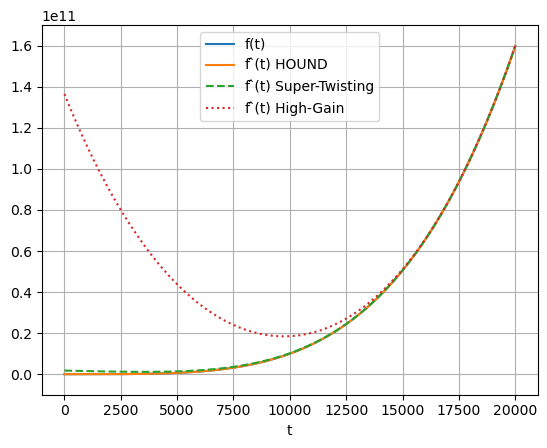

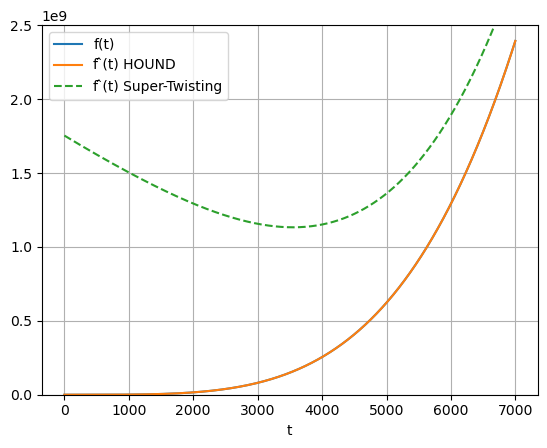

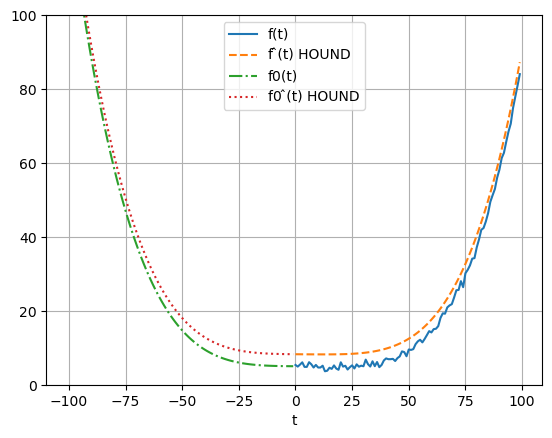

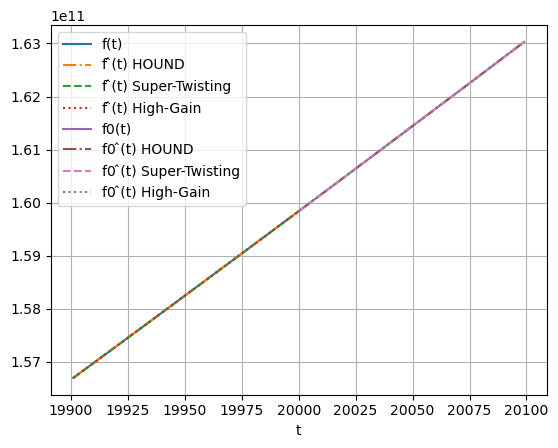

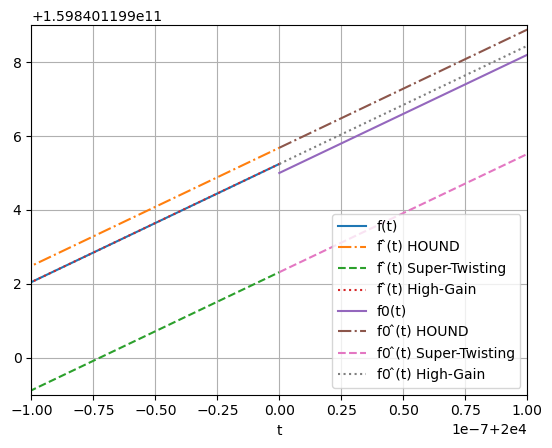

In [16]:
fig, ax = plt.subplots()
ax.set_ylim(-1e10, 17e10)
ax.plot(ts, fs, label='f(t)')
ax.plot(ts, interp_HOUND, label='f ̂(t) HOUND', linestyle="solid")
ax.plot(ts, interpLevant, label='f ̂(t) Super-Twisting', linestyle="dashed")
ax.plot(ts, interpKhalil, label='f ̂(t) High-Gain', linestyle="dotted")
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(0, 0.25e10)
ax.plot(ts[:7000], fs[:7000], label='f(t)')
ax.plot(ts[:7000], interp_HOUND[:7000], label='f ̂(t) HOUND', linestyle="solid")
ax.plot(ts[:7000], interpLevant[:7000], label='f ̂(t) Super-Twisting', linestyle="dashed")
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();


fig, ax = plt.subplots()
ax.set_ylim(0, 100)
x = 100
ax.plot(ts[:x], fs[:x], label='f(t)', linestyle="solid")
ax.plot(ts[:x], interp_HOUND[:x], label='f ̂(t) HOUND', linestyle="dashed")
ax.plot(extra_prev_ts, extra_prev_f0, label='f0(t)', linestyle="dashdot")
ax.plot(extra_prev_ts, extra_prev_z0_HOUND, label='f0 ̂(t) HOUND', linestyle="dotted")
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

fig, ax = plt.subplots()
x = -100
ax.plot(ts[x:], fs[x:], label='f(t)', linestyle="solid")
ax.plot(ts[x:], interp_HOUND[x:], label='f ̂(t) HOUND', linestyle="dashdot")
ax.plot(ts[x:], interpLevant[x:], label='f ̂(t) Super-Twisting', linestyle="dashed")
ax.plot(ts[x:], interpKhalil[x:], label='f ̂(t) High-Gain', linestyle="dotted")
ax.plot(extra_post_ts, extra_post_f0, label='f0(t)', linestyle="solid")
ax.plot(extra_post_ts, extra_post_z0_HOUND, label='f0 ̂(t) HOUND', linestyle="dashdot")
ax.plot(extra_post_ts, extra_post_z0Levant, label='f0 ̂(t) Super-Twisting', linestyle="dashed")
ax.plot(extra_post_ts, extra_post_z0Khalil, label='f0 ̂(t) High-Gain', linestyle="dotted")
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_xlim(20000-0.0000001, 20000+0.0000001)
ax.set_ylim(159840119925-6, 159840119925+4)
x = 2
ax.plot(ts[-x:], fs[-x:], label='f(t)', linestyle="solid")
ax.plot(ts[-x:], interp_HOUND[-x:], label='f ̂(t) HOUND', linestyle="dashdot")
ax.plot(ts[-x:], interpLevant[-x:], label='f ̂(t) Super-Twisting', linestyle="dashed")
ax.plot(ts[-x:], interpKhalil[-x:], label='f ̂(t) High-Gain', linestyle="dotted")
ax.plot(extra_post_ts[:x], extra_post_f0[:x], label='f0(t)', linestyle="solid")
ax.plot(extra_post_ts[:x], extra_post_z0_HOUND[:x], label='f0 ̂(t) HOUND', linestyle="dashdot")
ax.plot(extra_post_ts[:x], extra_post_z0Levant[:x], label='f0 ̂(t) Super-Twisting', linestyle="dashed")
ax.plot(extra_post_ts[:x], extra_post_z0Khalil[:x], label='f0 ̂(t) High-Gain', linestyle="dotted")
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

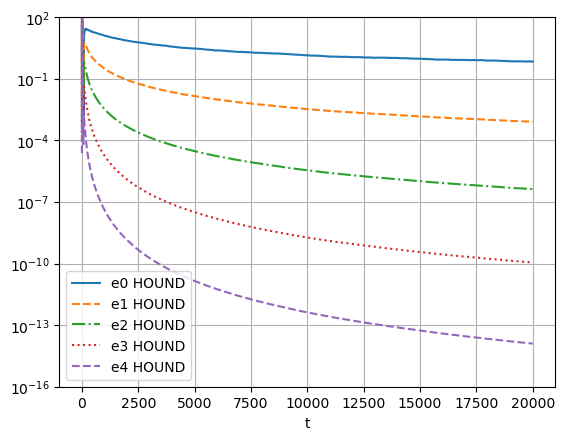

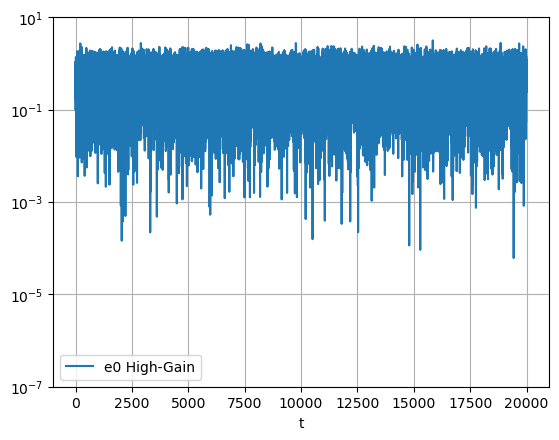

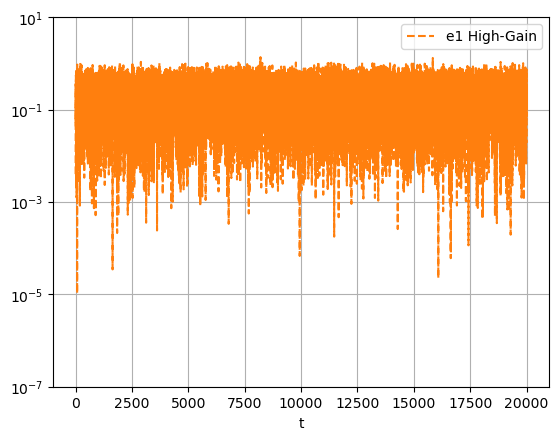

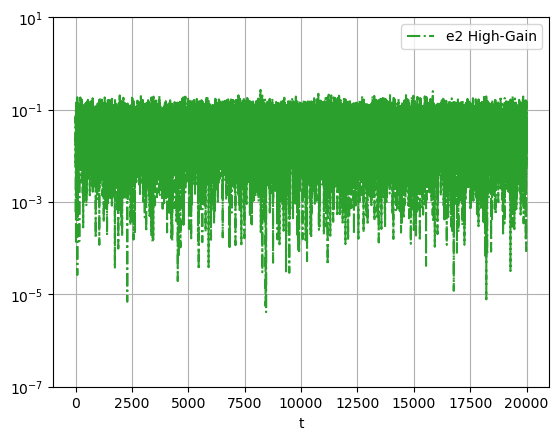

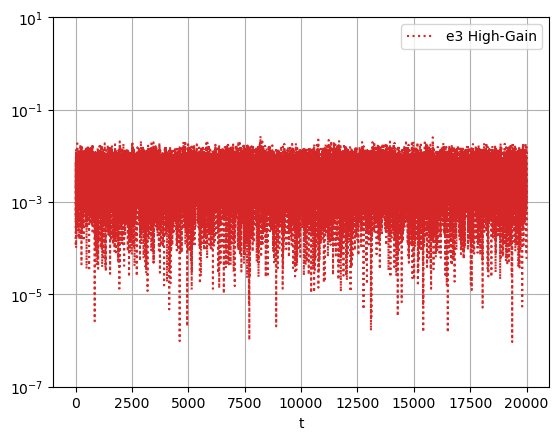

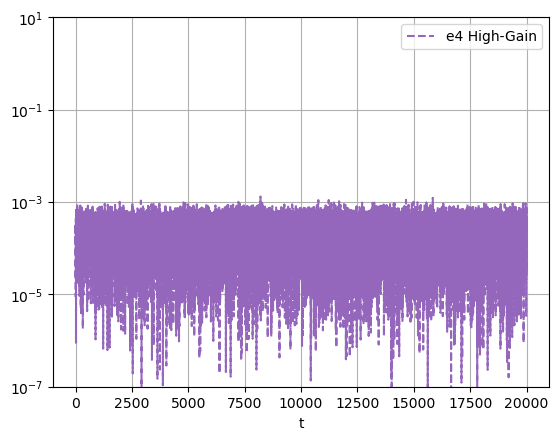

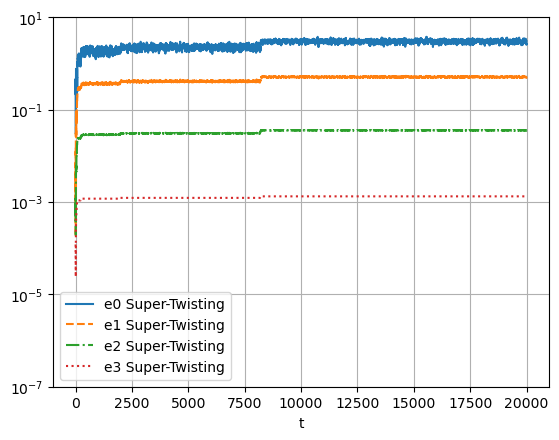

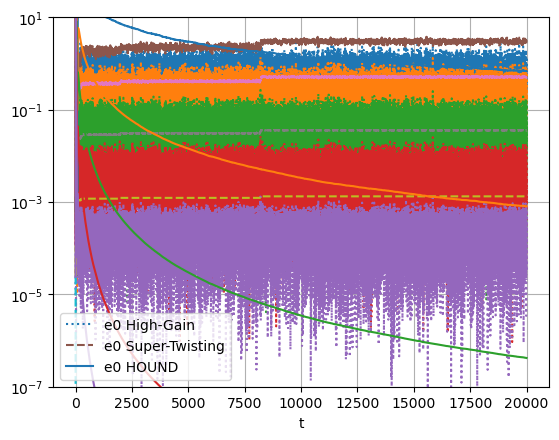

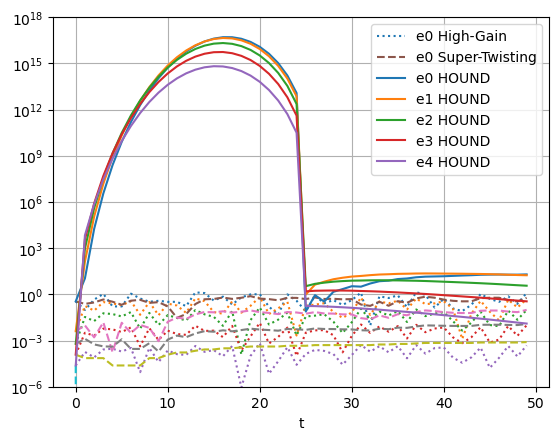

In [19]:
fig, ax = plt.subplots()
ax.set_ylim(1e-16, 1e2)
# for j in range(n):
#     ax.plot(ts, aes_HOUND[j], label='e'+str(j)+' HOUND', linestyle="solid")
ax.plot(ts, aes_HOUND[0], label='e0 HOUND', linestyle="solid")
ax.plot(ts, aes_HOUND[1], label='e1 HOUND', linestyle="dashed")
ax.plot(ts, aes_HOUND[2], label='e2 HOUND', linestyle="dashdot")
ax.plot(ts, aes_HOUND[3], label='e3 HOUND', linestyle="dotted")
ax.plot(ts, aes_HOUND[4], label='e4 HOUND', linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();



fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[0], label='e0 High-Gain', linestyle="solid")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[1], linestyle="None")
ax.plot(ts, aesKhalil[1], label='e1 High-Gain', linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[2], linestyle="None")
ax.plot(ts, aesKhalil[2], linestyle="None")
ax.plot(ts, aesKhalil[2], label='e2 High-Gain', linestyle="dashdot")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[3], linestyle="None")
ax.plot(ts, aesKhalil[3], linestyle="None")
ax.plot(ts, aesKhalil[3], linestyle="None")
ax.plot(ts, aesKhalil[3], label='e3 High-Gain', linestyle="dotted")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[4], linestyle="None")
ax.plot(ts, aesKhalil[4], linestyle="None")
ax.plot(ts, aesKhalil[4], linestyle="None")
ax.plot(ts, aesKhalil[4], linestyle="None")
ax.plot(ts, aesKhalil[4], label='e4 High-Gain', linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();


fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesLevant[0], label='e0 Super-Twisting', linestyle="solid")
ax.plot(ts, aesLevant[1], label='e1 Super-Twisting', linestyle="dashed")
ax.plot(ts, aesLevant[2], label='e2 Super-Twisting', linestyle="dashdot")
ax.plot(ts, aesLevant[3], label='e3 Super-Twisting', linestyle="dotted")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();



fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[0], label='e'+str(0)+' High-Gain', linestyle="dotted")
for j in range(1,n):
    ax.plot(ts, aesKhalil[j], linestyle="dotted")
ax.plot(ts, aesLevant[0], label='e'+str(0)+' Super-Twisting', linestyle="dashed")
for j in range(1,n):
    ax.plot(ts, aesLevant[j], linestyle="dashed")
ax.plot(ts, aes_HOUND[0], label='e'+str(0)+' HOUND', linestyle="solid")
for j in range(1,n):
    ax.plot(ts, aes_HOUND[j], linestyle="solid")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-6, 1e18)
ax.plot(ts[:50], aesKhalil[0][:50], label='e'+str(0)+' High-Gain', linestyle="dotted")
for j in range(1,n):
    ax.plot(ts[:50], aesKhalil[j][:50], linestyle="dotted")
ax.plot(ts[:50], aesLevant[0][:50], label='e'+str(0)+' Super-Twisting', linestyle="dashed")
for j in range(1,n):
    ax.plot(ts[:50], aesLevant[j][:50], linestyle="dashed")
for j in range(n):
    ax.plot(ts[:50], aes_HOUND[j][:50], label='e'+str(j)+' HOUND', linestyle="solid")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

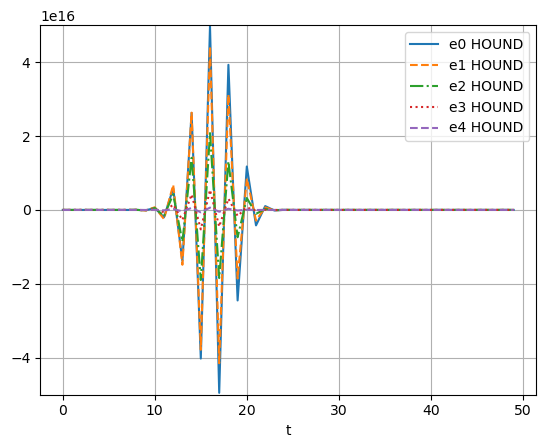

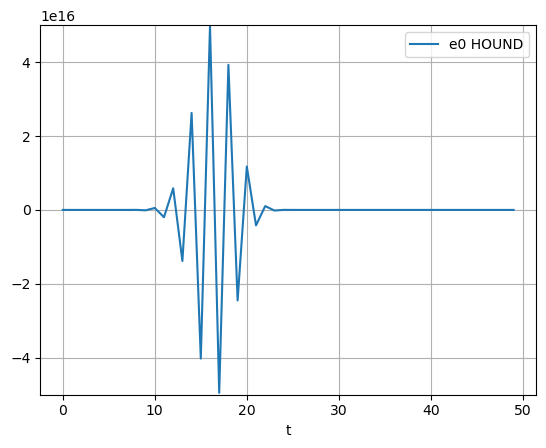

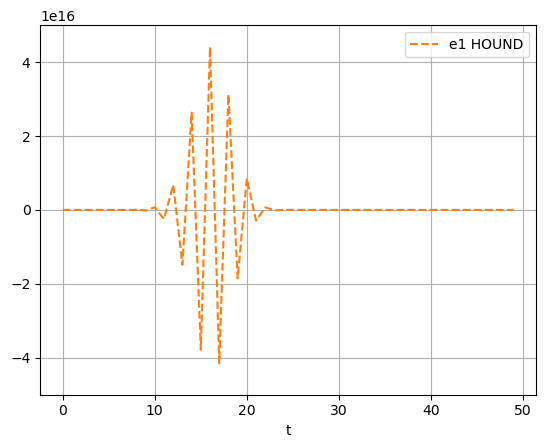

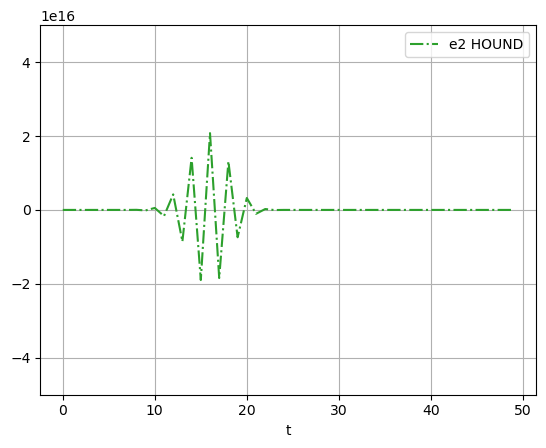

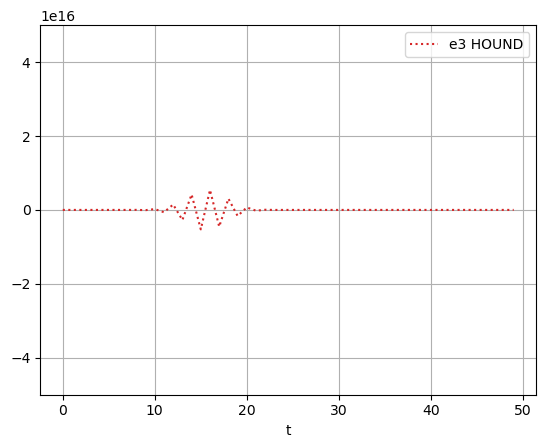

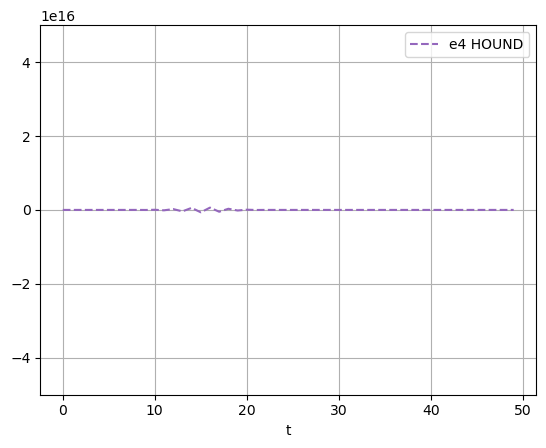

In [21]:
fig, ax = plt.subplots()
ax.set_ylim(-5e16, 5e16)
ax.plot(ts[:50], es_HOUND[0][:50], label='e0 HOUND', linestyle="solid")
ax.plot(ts[:50], es_HOUND[1][:50], label='e1 HOUND', linestyle="dashed")
ax.plot(ts[:50], es_HOUND[2][:50], label='e2 HOUND', linestyle="dashdot")
ax.plot(ts[:50], es_HOUND[3][:50], label='e3 HOUND', linestyle="dotted")
ax.plot(ts[:50], es_HOUND[4][:50], label='e4 HOUND', linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();


fig, ax = plt.subplots()
ax.set_ylim(-5e16, 5e16)
ax.plot(ts[:50], es_HOUND[0][:50], label='e0 HOUND', linestyle="solid")
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(-5e16, 5e16)
ax.plot(ts[:50], es_HOUND[1][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[1][:50], label='e1 HOUND', linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(-5e16, 5e16)
ax.plot(ts[:50], es_HOUND[2][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[2][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[2][:50], label='e2 HOUND', linestyle="dashdot")
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(-5e16, 5e16)
ax.plot(ts[:50], es_HOUND[3][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[3][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[3][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[3][:50], label='e3 HOUND', linestyle="dotted")
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(-5e16, 5e16)
ax.plot(ts[:50], es_HOUND[4][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[4][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[4][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[4][:50], linestyle="None")
ax.plot(ts[:50], es_HOUND[4][:50], label='e4 HOUND', linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();

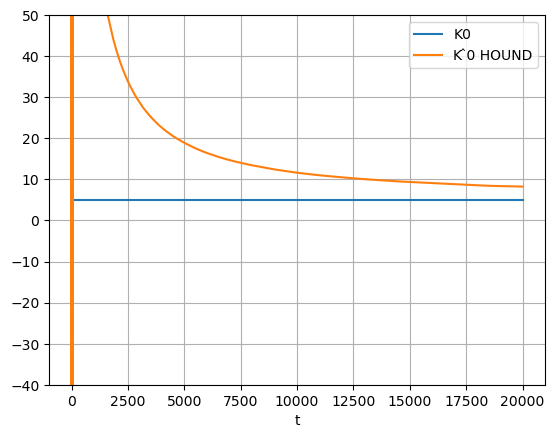

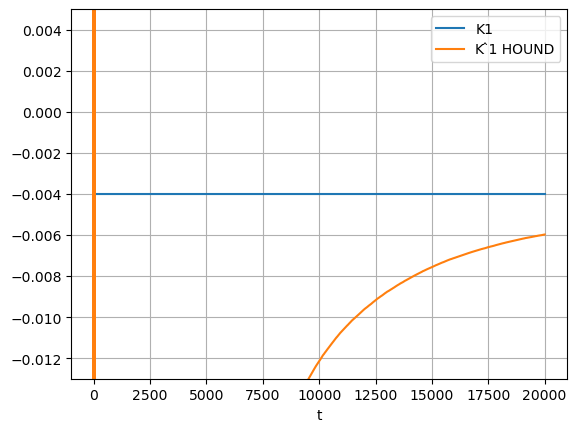

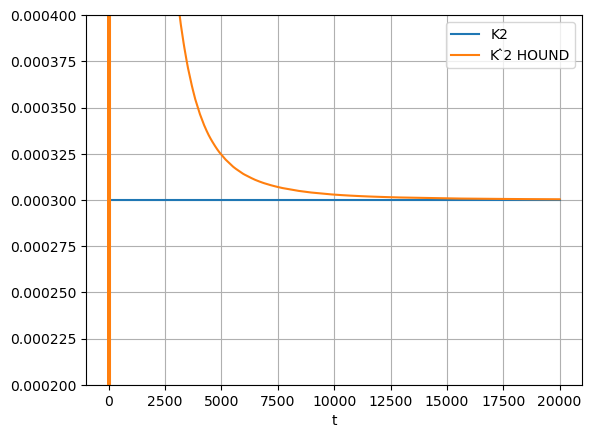

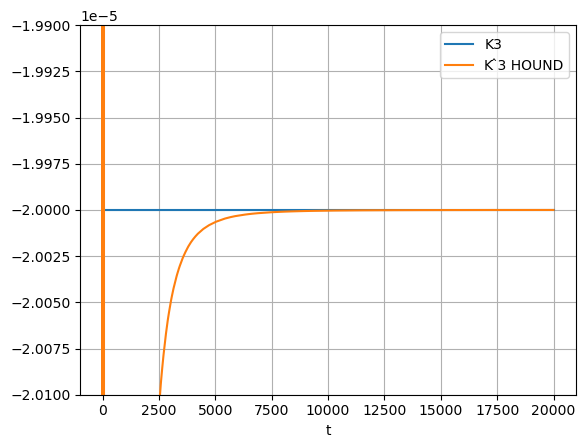

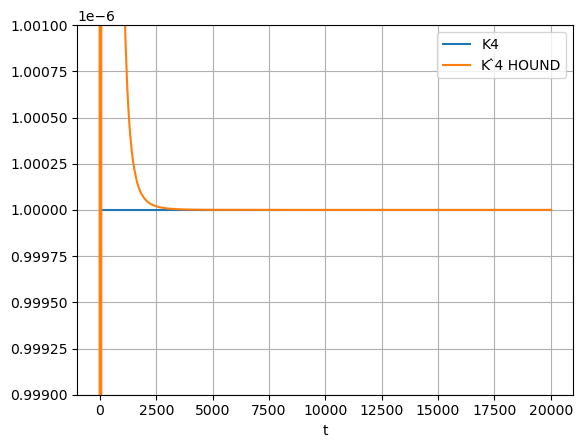

In [12]:
for j in range(n):
    fig, ax = plt.subplots()#figsize=(14, 8))
    if j==0:
        x=45
        ax.set_ylim(5-x, 5+x)
    if j==1:
        x = 0.009
        ax.set_ylim(-0.004-x, -0.004+x)
    if j==2:
        x = 0.0001
        ax.set_ylim(0.0003-x, 0.0003+x)
    if j==3:
        x = 0.0000001
        ax.set_ylim(-0.00002-x, -0.00002+x)
    if j==4:
        x = 0.000000001 #0.000001
        ax.set_ylim(0.000001-x, 0.000001+x)
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], label='K'+str(j))
    ax.plot(ts, ks_HOUND[j], label='K ̂'+str(j)+' HOUND', linestyle="solid")
    ax.grid();
    ax.set_xlabel("t")
    plt.legend()
    plt.show();

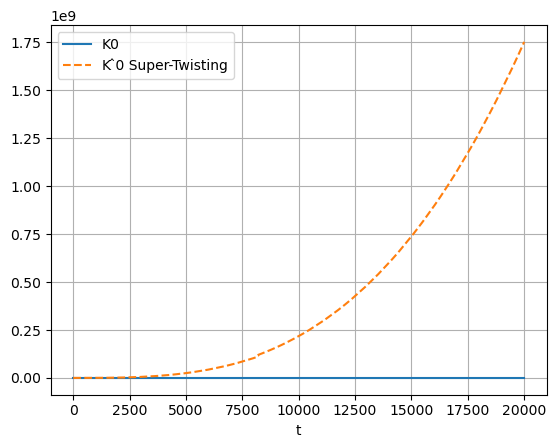

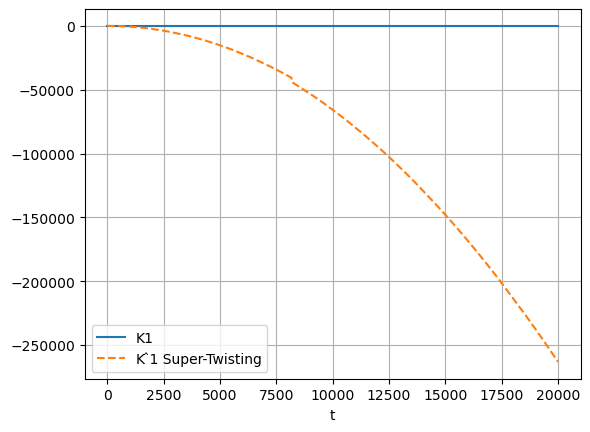

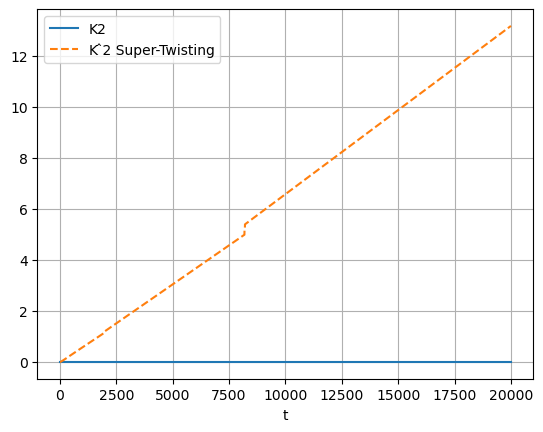

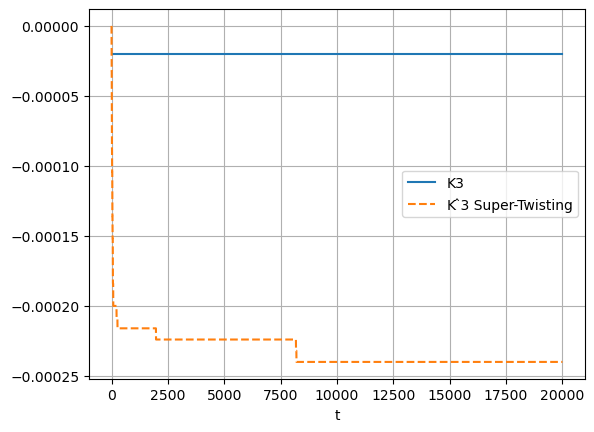

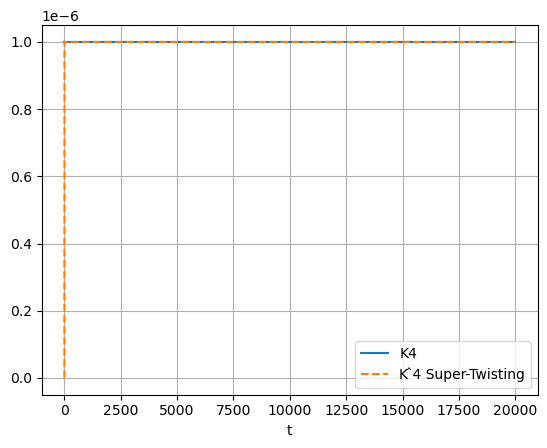

In [13]:
for j in range(n):
    fig, ax = plt.subplots()#figsize=(14, 8))
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], label='K'+str(j))
    ax.plot(ts, ksLevant[j], label='K ̂'+str(j)+' Super-Twisting', linestyle="dashed")
    ax.grid();
    ax.set_xlabel("t")
    plt.legend()
    plt.show();

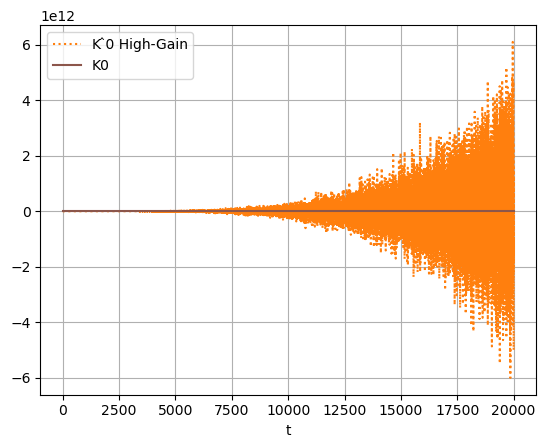

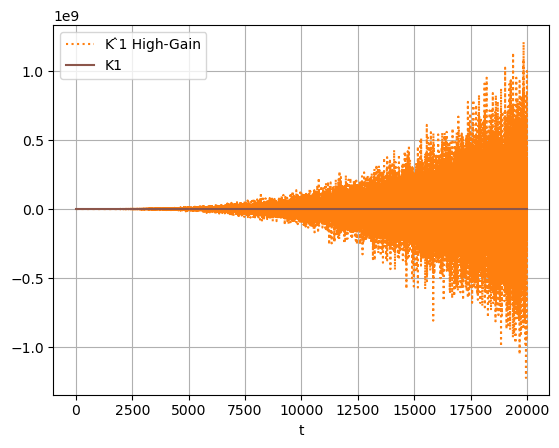

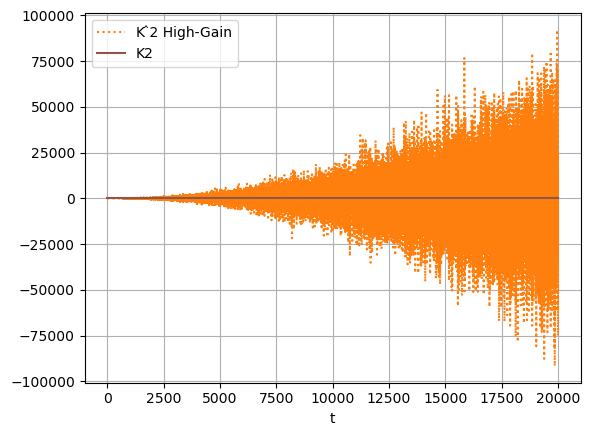

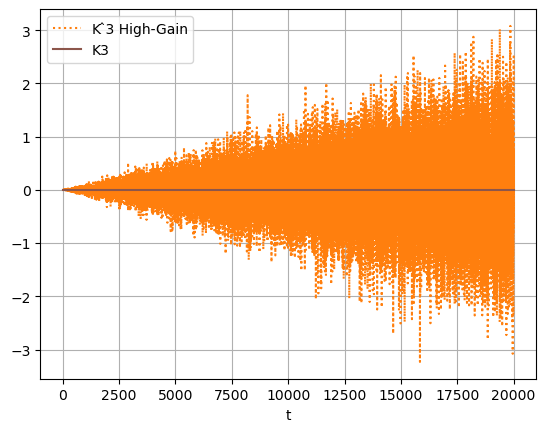

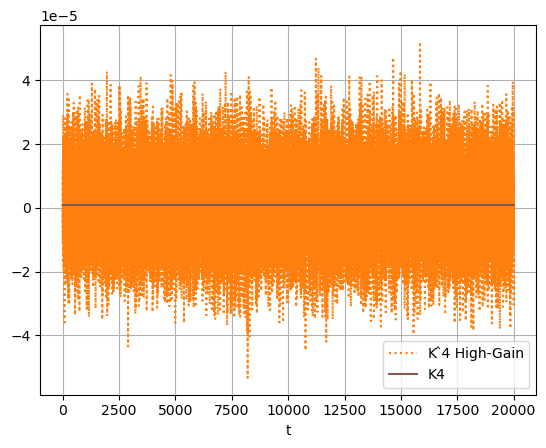

In [14]:
for j in range(n):
    fig, ax = plt.subplots()#figsize=(14, 8))
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], linestyle="None")
    ax.plot(ts, ksKhalil[j], label='K ̂'+str(j)+' High-Gain', linestyle="dotted")
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], linestyle="None")
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], linestyle="None")
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], linestyle="None")
    ax.plot([ts[0],ts[-1]], [K[j],K[j]], label='K'+str(j))

    ax.grid();
    ax.set_xlabel("t")
    plt.legend()
    plt.show();